In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the dataset 

In [153]:
data=pd.read_csv('titanic_dataset .csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. pre-processing 

In [154]:
data.shape

(891, 12)

In [155]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [158]:
#null value detection
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
#filling null values
data['Age']=data['Age'].fillna(data['Age'].median())
data['Embarked']=data['Embarked'].fillna(method='ffill')
data['Cabin'].fillna('T',inplace= True)

In [160]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [161]:
#outlier detection
num_columns = ['Age','Fare']


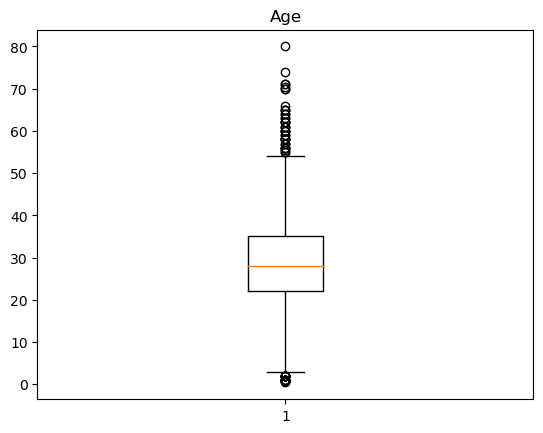

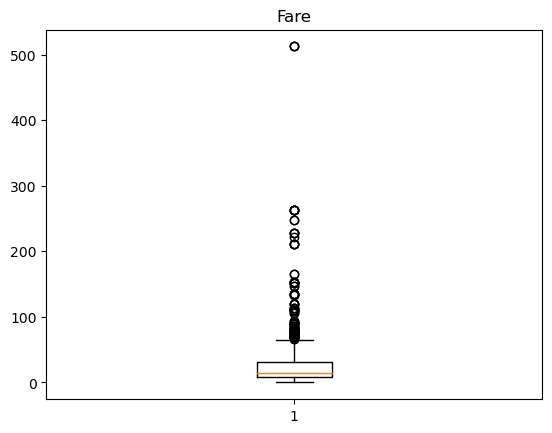

In [162]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [163]:
#Handling outliers in column fare
Q1 = np.percentile(data["Fare"],25,method="midpoint")
Q2 = np.percentile(data["Fare"],50,method="midpoint")
Q3 = np.percentile(data["Fare"],75,method="midpoint")

In [164]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 7.9104
Q2 is 14.4542
Q3 is 31.0


In [165]:
IQR = Q3 -Q1


low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is -26.724
max is 65.6344


In [166]:
outlier = []
for x in data['Fare']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [167]:
ind = data["Fare"]>up_lim
data.loc[ind].index

Int64Index([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102,
            ...
            792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
           dtype='int64', length=116)

In [168]:
data.drop(data.loc[ind].index,inplace = True)

In [169]:
#Handling outliers in column age
R1 = np.percentile(data["Age"],25,method="midpoint")
R2 = np.percentile(data["Age"],50,method="midpoint")
R3 = np.percentile(data["Age"],75,method="midpoint")

In [170]:
print("R1 is",R1)
print("R2 is",R2)
print("R3 is",R3)

R1 is 22.0
R2 is 28.0
R3 is 34.0


In [171]:
IRR = R3 -R1


low_lim = R1 - 1.5*IRR
up_lim = R3 + 1.5*IRR
print("min is", low_lim)
print("max is", up_lim)

min is 4.0
max is 52.0


In [172]:
outlier = []
for x in data['Age']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)


In [173]:
ind1 = data["Age"]>up_lim
data.loc[ind1].index

Int64Index([  6,  11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 232, 249,
            252, 280, 317, 326, 456, 467, 483, 487, 492, 493, 513, 545, 555,
            570, 571, 582, 625, 626, 630, 647, 672, 684, 694, 772, 774, 851],
           dtype='int64')

In [174]:
data.drop(data.loc[ind1].index,inplace = True)

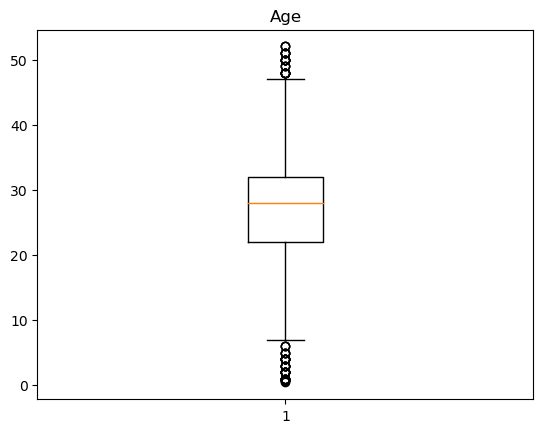

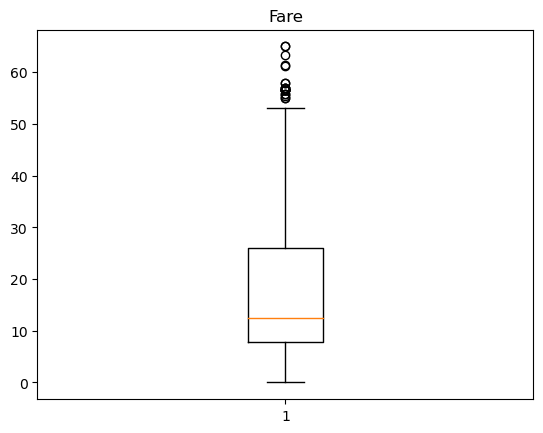

In [175]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [176]:
#removing unnecessary columns
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)
data=data.drop('PassengerId',axis=1)

In [177]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,T,S
2,1,3,female,26.0,0,0,7.9250,T,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,T,S
5,0,3,male,28.0,0,0,8.4583,T,Q


In [178]:
#encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
col =['Sex','Cabin','Embarked']
for i in col:
  data[i]=le.fit_transform(data[i])

In [179]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,71,2
2,1,3,0,26.0,0,0,7.9250,71,2
3,1,1,0,35.0,1,0,53.1000,26,2
4,0,3,1,35.0,0,0,8.0500,71,2
5,0,3,1,28.0,0,0,8.4583,71,1


In [180]:
#scaling
features_to_scale = ['Age', 'Fare']

In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])


In [182]:
scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

3. Create kNN and SVM models

In [183]:
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

In [187]:
# Create k-Nearest Neighbors (kNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model

KNeighborsClassifier()

In [188]:
metric_k=[]
neighbors=np.arange(3,15)

In [189]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  classifier.fit(X_train,y_train)
  y_pred1=classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred1)
  metric_k.append(acc)

In [190]:
print('Accuracy =' , accuracy_score(y_test,y_pred1))

Accuracy = 0.6418918918918919


In [191]:
from sklearn.svm import SVC

In [192]:
# Create Support Vector Machine (SVM) model
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(X_train,y_train)
y_pred_svm=svm_cls.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [194]:
confusion_matrix(y_test,y_pred_svm)

array([[81,  6],
       [40, 21]], dtype=int64)

In [195]:
accuracy_score(y_test,y_pred_svm)

0.6891891891891891

4. Do k-fold and stratified stratified k-fold cross validation techniques and find the
average accuracy score of the models

In [196]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [197]:
# Cross-validation
# 5-fold Cross-Validation for kNN
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=kfold)

In [198]:
# 5-fold Stratified Cross-Validation for SVM
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_cls, X_train, y_train, cv=stratified_kfold)

In [199]:
# Calculate and print the average accuracy scores
average_knn_score = knn_scores.mean()
average_svm_score = svm_scores.mean()

In [200]:
print("kNN Average Accuracy:", average_knn_score)
print("SVM Average Accuracy:", average_svm_score)

kNN Average Accuracy: 0.695668549905838
SVM Average Accuracy: 0.6904679125018109
